# Song popularity on Spotify

Data Camp | M2 Data Sciences 2021-2022

Barrère Elise, Chouaieb Youssef, Cortés Carlos, Denis Matthieu, Haoula Narjes, Millot Emma 

## Table of Content:
* [Introduction](#intro)
    * [Objective](#obj)
    * [The data](#data)
    * [Metrics](#metrics)
* [Data Exploration](#dataviz)
    * [Loading the data](#load)
    * [Exploration related to the characteristics of the tracks](#carac)
    * [Exploration related to the information of the tracks](#info)
        * [Artists](#artists)
        * [Years](#years)


<img src="spotify_image.jpg" width="700">

## Introduction
<a class="anchor" id="intro"></a>
Music occupies a central place in the lives of many. It has been shown that the average American hears or listens to music up to 27 hours per week.  The online music streaming market has been booming since the 2010s and the major player in this market is Spotify. With 406 million monthly active users and 180 million premium subscribers in 2021 and more than 50 million songs available on the platform, the service is really popular. 


The Swedish entreprise is extremely keen on data, and it makes no doubt that its popularity over its opponents is largely due to its understanding of custumers and its almost-magic recommendation system. Without being a record label, Spotify is calling the shots on the popularity of the songs and the artists, because 30% of its users listen to the personalized playlists generated automatically by the platform.

What makes a song popular ? How can we describe songs ? How can we know what a user will like listening to? It seems that Spotify knows the answers to all these questions and is willing to share part of its knowledge with us. 


### Objective :
<a class="anchor" id="obj"></a>

Our objective here is to be able to predict the popularity of song based on its audio features. 

### The data
<a class="anchor" id="data"></a>

Spotify provides an API which allows users to get a multitude of informations regarding the tracks present on the platform. The dta used for this project was exclusively collected using this API. An example jupyter notebook is provided [here](https://github.com/e-barrere/Spotify-Song-Popularity-Prediction/blob/master/use_api_model.ipynb) to show the procedure employed.  

The data is composed of factual and technical details about songs. Each song is indexed by a unique identifier, and several features are retrieved from it. These features are described here (technical descriptions are taken from [here](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features))

- **Release year/date**
- **Artists** both referred by names and ids
- **Song title** both referred by names and ids
- **Genre** : all of the possible genres are listed on this [website](https://everynoise.com/everynoise1d.cgi?scope=mainstream%20only&vector=popularity)
- **Danceability** : describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity
- **Key** : The key the track is in. Integers map to pitches using standard Pitch Class notation.
- **Loudness** : The overall loudness of a track in decibels (dB)
- **Mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **Speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value
- **Acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Instrumentalness** : Predicts whether a track contains no vocals. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Liveness** : Detects the presence of an audience in the recording.
- **Valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- **Tempo** : The overall estimated tempo of a track in beats per minute (BPM). 
- **Duration_ms** : The duration of the track in milliseconds.
- **Time_signature** : An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). 

The aim of this challenge is to predict the popularity of a song. Let's dive into the popularity metric. 

The popularity is a score (integer) from 0 to 100. It is also computed by Spotify. It is a combination of recent stream counts and other factors such as the number of playlists the track is in, save rate, skip rate, and share rate. The popularity is measured at a certain time $t$, and in the case of this challenge it refers to the popularity of songs in March 2022.

### Metrics
<a class="anchor" id="metrics"></a>

In the case of a regression, there are three scores that are used usually. They are the **Mean Squared Error (MSE)**, the **Root Mean Squared Error (RMSE)** and the **Mean Absolute Error (MAE)**. 

The MSE computes the average squared Euclidean distance between the data $y_i$ and the prediction $\hat{y}_i$

$$
    MSE(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

The RMSE is the square root of the MSE. It has the advantage of being in the same unit as the predictions and the data.$

$$
    RMSE(y, \hat{y}) = \sqrt{ MSE(y, \hat{y})} = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2}
$$

The MAE computes the average Manhattan distance between the data $y_i$ and the prediction $\hat{y}_i$

$$
    MAE(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y}_i| \enspace .
$$

The score used in the challenge is the **RMSE**.

## Data Exploration
<a class="anchor" id="dataviz"></a>

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import os
 

%matplotlib inline
sns.set_theme(style="whitegrid", palette="pastel")
fontsize = 16
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize - 2,
      'ytick.labelsize': fontsize - 2, 
    'axes.titlesize' : fontsize + 2,}
plt.rcParams.update(params)

### Loading the data 
<a class="anchor" id="load"></a>

The 920 simulations have been split into two *training* and *testing* datasets.

* The *training* dataset is composed of 23,779 tracks and is accessible in CSV format under the __train__ folder
* The *testing* dataset is composed of 5,945 tracks and is accessible in CSV format under the __test__ folder


In [17]:
df = pd.concat([pd.read_csv(os.path.join('data','test.csv'), sep=','),
                pd.read_csv(os.path.join('data','train.csv'), sep=',')])

In [18]:
df = df.drop(columns=['Unnamed: 0'])

track_info = ['artist_name', 'track_name', 'track_id', 'popularity', 'genre', 'year']
track_cara = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness' , 'valence', 'tempo',
               'duration_ms' , 'popularity']

In [19]:
df.head()

,artist_name,track_name,track_id,popularity,artist_id,artists_id,artists_names,year,genre,danceability,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,G-Eazy,Provide (feat. Chris Brown & Mark Morrison),0tQmgwFKw9069z1BXniOiA,65,02kJSzxNuaWGqwubyUba0Z,"['02kJSzxNuaWGqwubyUba0Z', '7bXgB6jMjp9ATFy66e...","['G-Eazy', 'Chris Brown', 'Mark Morrison']",2021,pop,0.652,...,0.3070,0.661,95.025,audio_features,0tQmgwFKw9069z1BXniOiA,spotify:track:0tQmgwFKw9069z1BXniOiA,https://api.spotify.com/v1/tracks/0tQmgwFKw906...,https://api.spotify.com/v1/audio-analysis/0tQm...,186350,4
1,Sammie,Good Life (feat. Rick Ross),79LpcrCVt3sYsiRSHmH1H9,53,4p07QU02SrLsaORo25h2Lg,"['4p07QU02SrLsaORo25h2Lg', '1sBkRIssrMs1AbVkOJ...","['Sammie', 'Rick Ross']",2017,urban contemporary,0.776,...,0.2290,0.596,139.974,audio_features,79LpcrCVt3sYsiRSHmH1H9,spotify:track:79LpcrCVt3sYsiRSHmH1H9,https://api.spotify.com/v1/tracks/79LpcrCVt3sY...,https://api.spotify.com/v1/audio-analysis/79Lp...,236893,4
2,Escape the Fate,Broken Heart,5LV0oQV98daZAUoWnQEW6N,63,5ojhEavq6altxW8fWIlLum,['5ojhEavq6altxW8fWIlLum'],['Escape the Fate'],2018,pop,0.528,...,0.2680,0.591,95.020,audio_features,5LV0oQV98daZAUoWnQEW6N,spotify:track:5LV0oQV98daZAUoWnQEW6N,https://api.spotify.com/v1/tracks/5LV0oQV98daZ...,https://api.spotify.com/v1/audio-analysis/5LV0...,187372,4
3,Lucas Lucco,Princesinha (feat. Maluma) - Ao Vivo,7Ge5Ih0PMGYLR14eTwaMsK,33,06cd30Cv9US973Ika84gDw,"['06cd30Cv9US973Ika84gDw', '1r4hJ1h58CWwUQe3Mx...","['Lucas Lucco', 'Maluma']",2015,funk carioca,0.695,...,0.9280,0.607,131.937,audio_features,7Ge5Ih0PMGYLR14eTwaMsK,spotify:track:7Ge5Ih0PMGYLR14eTwaMsK,https://api.spotify.com/v1/tracks/7Ge5Ih0PMGYL...,https://api.spotify.com/v1/audio-analysis/7Ge5...,205773,4
4,DaBaby,Ball If I Want To,0cu0rhnlCnJ7JIeHRiLpj3,80,4r63FhuTkUYltbVAg5TQnk,['4r63FhuTkUYltbVAg5TQnk'],['DaBaby'],2021,rap,0.902,...,0.0728,0.628,139.949,audio_features,0cu0rhnlCnJ7JIeHRiLpj3,spotify:track:0cu0rhnlCnJ7JIeHRiLpj3,https://api.spotify.com/v1/tracks/0cu0rhnlCnJ7...,https://api.spotify.com/v1/audio-analysis/0cu0...,112547,4


This dataset contains a lot of information. Let's explore it a little.

### Exploration related to the characteristics of the tracks
<a class="anchor" id="carac"></a>

In [12]:
df[track_cara].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,23779.000000,23779.000000,23779.000000,23779.000000,23779.000000,23779.000000,23779.000000,23779.000000,23779.000000,23779.000000,23779.000000,2.377900e+04,23779.000000
mean,0.619745,0.649748,5.275579,-6.710246,0.627486,0.096444,0.260947,0.032517,0.196498,0.499847,122.150192,2.178038e+05,50.845410
std,0.149167,0.194813,3.581919,2.881816,0.483484,0.099490,0.268272,0.131838,0.170269,0.231965,29.465218,6.696456e+04,19.356038
min,0.087300,0.000243,0.000000,-39.627000,0.000000,0.022400,0.000001,0.000000,0.011400,0.027700,43.509000,2.077300e+04,0.000000
25%,0.519000,0.519000,2.000000,-8.094000,0.000000,0.036300,0.033500,0.000000,0.097700,0.318000,98.052500,1.825540e+05,45.000000
50%,0.629000,0.666000,5.000000,-6.216000,1.000000,0.053600,0.163000,0.000002,0.127000,0.491000,120.036000,2.095750e+05,55.000000
75%,0.730000,0.803000,8.000000,-4.753000,1.000000,0.109500,0.426500,0.000301,0.240000,0.680000,141.017000,2.410065e+05,63.000000
max,0.985000,0.998000,11.000000,2.961000,1.000000,0.942000,0.994000,0.977000,0.993000,0.991000,220.099000,3.340672e+06,100.000000


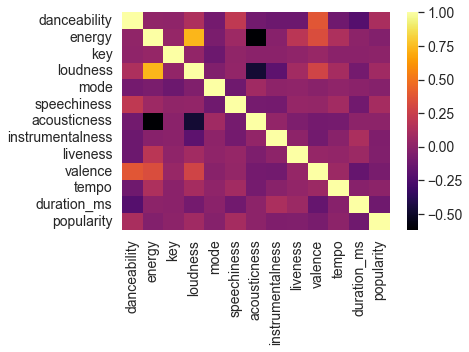

In [14]:
corr_cara = df[track_cara].corr()
sns.heatmap(corr_cara, cmap='inferno')
plt.show()

We can see that only few of the variables are correlated.

In [21]:
corr_cara['popularity'].abs().sort_values(ascending=False)[1:5]

duration_ms     0.120115
danceability    0.117869
speechiness     0.095971
loudness        0.079942
Name: popularity, dtype: float64

The popularity variable does not seem to depend on the audio caracteristics variables.

### Exploration related to the information of the tracks
<a class='anchor' id='info'></a>

#### Artists
<a class='anchor' id='artists'></a>

Let us study the 20 artists from which we have the largest number of tracks.

In [22]:
df_top_artist = df['artist_name'].value_counts()[:20]
df_top_artist

BTS                       124
Drake                     109
Taylor Swift               93
Future                     93
The Weeknd                 90
$uicideboy$                86
J Balvin                   83
Shawn Mendes               71
Zé Neto & Cristiano        67
Justin Bieber              66
Ed Sheeran                 62
Kodak Black                61
Henrique & Juliano         61
Los Tucanes De Tijuana     59
Halsey                     59
Young Thug                 56
Alessia Cara               55
Gusttavo Lima              54
Maluma                     54
Feid                       53
Name: artist_name, dtype: int64

In [30]:
dfg = df.groupby(['artist_name', 'genre']).count()

In [47]:
dfg = df.groupby(['artist_name', 'genre']).count()
for artist in df_top_artist.index:
    print(f"{artist}, mean popularity: {df[df['artist_name'] == artist]['popularity'].mean():.3f}", 
          f"\ndifferent genres: {len(dfg.loc[artist])}")

BTS, mean popularity: 69.371 
different genres: 3
Drake, mean popularity: 67.679 
different genres: 4
Taylor Swift, mean popularity: 71.667 
different genres: 1
Future, mean popularity: 59.785 
different genres: 6
The Weeknd, mean popularity: 62.600 
different genres: 4
$uicideboy$, mean popularity: 60.756 
different genres: 4
J Balvin, mean popularity: 29.783 
different genres: 5
Shawn Mendes, mean popularity: 54.437 
different genres: 5
Zé Neto & Cristiano, mean popularity: 54.403 
different genres: 4
Justin Bieber, mean popularity: 61.015 
different genres: 2
Ed Sheeran, mean popularity: 53.774 
different genres: 2
Kodak Black, mean popularity: 52.016 
different genres: 4
Henrique & Juliano, mean popularity: 60.049 
different genres: 3
Los Tucanes De Tijuana, mean popularity: 25.475 
different genres: 4
Halsey, mean popularity: 62.525 
different genres: 5
Young Thug, mean popularity: 54.464 
different genres: 6
Alessia Cara, mean popularity: 37.818 
different genres: 5
Gusttavo Lima

Let's study the relation between the covariates and the popularity for one artist. We pick Drake as his songs have one of the highest average popularity and he does different genres. 

In [48]:
X_art = df[df['artist_name'] == 'Drake'][track_cara]
X_art

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
312,0.714,0.563,1,-7.574,1,0.0723,0.0266,0.000000,0.0776,0.310,100.091,241853,70
634,0.554,0.850,5,-4.155,1,0.2510,0.1070,0.000000,0.1550,0.383,128.429,283307,58
692,0.809,0.463,11,-11.377,1,0.0396,0.2560,0.085000,0.1090,0.364,111.980,298941,85
899,0.609,0.229,11,-12.360,0,0.0333,0.5580,0.041300,0.1130,0.190,111.887,186293,67
1263,0.746,0.475,10,-11.243,0,0.1130,0.0175,0.000011,0.1970,0.292,80.006,241400,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22054,0.519,0.851,7,-6.001,1,0.2900,0.1180,0.000000,0.1780,0.711,123.823,213104,73
22599,0.666,0.465,1,-8.545,1,0.2600,0.0503,0.000000,0.2150,0.292,167.937,291175,88
23182,0.766,0.283,8,-10.330,0,0.0846,0.1110,0.017200,0.1150,0.144,97.040,219692,80
23235,0.787,0.646,7,-7.792,1,0.1010,0.0504,0.000025,0.1040,0.426,117.969,263360,53


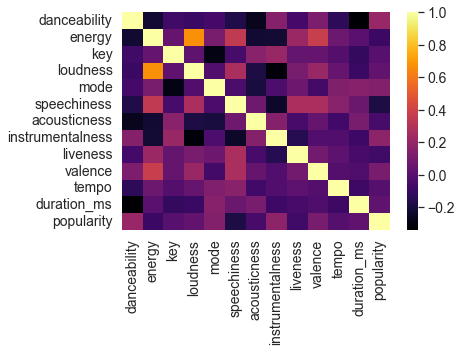

In [49]:
corr_art = X_art.corr()
sns.heatmap(corr_art, cmap='inferno')
plt.show()

In [51]:
X_art['popularity_qualy'] = (X_art['popularity'] > 68) * 3 + \
                            ((X_art['popularity'] <= 68) & (X_art['popularity'] >= 63)) * 2 + \
                            (X_art['popularity'] <= 63) * 1

X_art_gb_pop = X_art.groupby(by='popularity_qualy').mean()
X_art_gb_pop

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
popularity_qualy,,,,,,,,,,,,,
1,0.603226,0.556323,5.193548,-7.785710,0.483871,0.255016,0.249315,0.000054,0.249452,0.298213,117.290387,250952.483871,56.612903
2,0.690038,0.542885,4.961538,-7.997500,0.576923,0.176346,0.258759,0.002465,0.173119,0.359038,118.254346,228778.615385,66.307692
3,0.697558,0.507212,5.096154,-7.963712,0.615385,0.201023,0.206703,0.005556,0.197833,0.332531,117.649615,234229.673077,74.961538


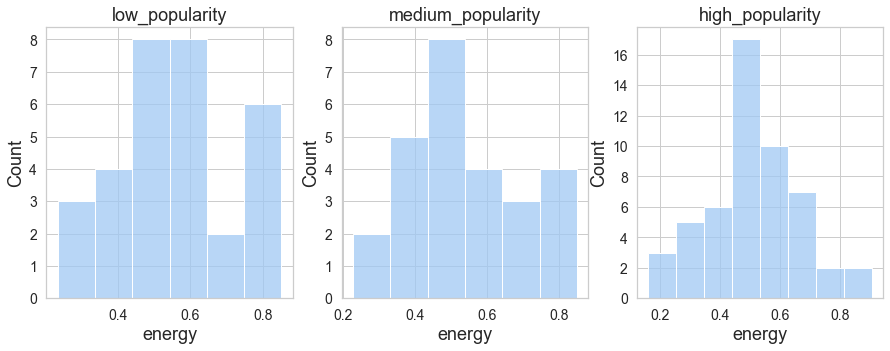

In [52]:
pop_q = {1: 'low_popularity', 2: 'medium_popularity', 3: 'high_popularity'}
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for pop in pop_q.keys():
    sns.histplot(X_art[X_art['popularity_qualy'] == pop]['energy'], ax=axs[pop-1])
    axs[pop-1].set_title(pop_q[pop])
plt.show()

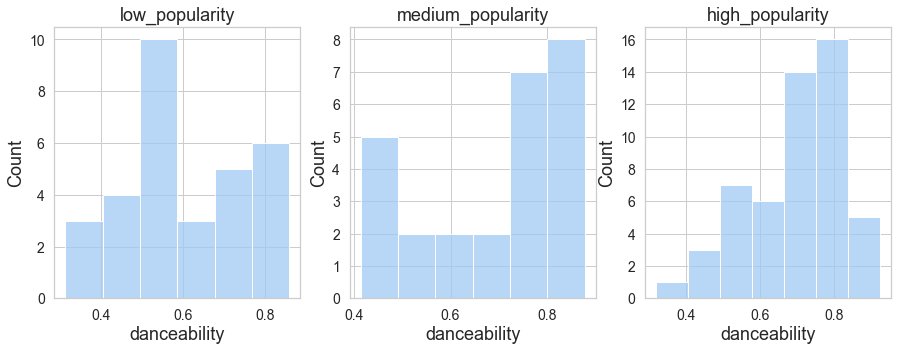

In [53]:
pop_q = {1: 'low_popularity', 2: 'medium_popularity', 3: 'high_popularity'}
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for pop in pop_q.keys():
    sns.histplot(X_art[X_art['popularity_qualy'] == pop]['danceability'], ax=axs[pop-1])
    axs[pop-1].set_title(pop_q[pop])
plt.show()

These results show that within intervals of popularity, the distribution of the audio features are different. 

#### Years
<a class='anchor' id='years'></a>

One could imagine that the popularity of a song may be influenced by its release date, which is inferred by the insights that we have on the construction of the popularity metric. Let's explore this.  

In [54]:
df['year'].value_counts()

2022    4757
2021    4561
2018    4156
2016    4136
2015    4075
2017    4052
2020    3987
Name: year, dtype: int64

Let us look at the distribution of the popularity feature per year.

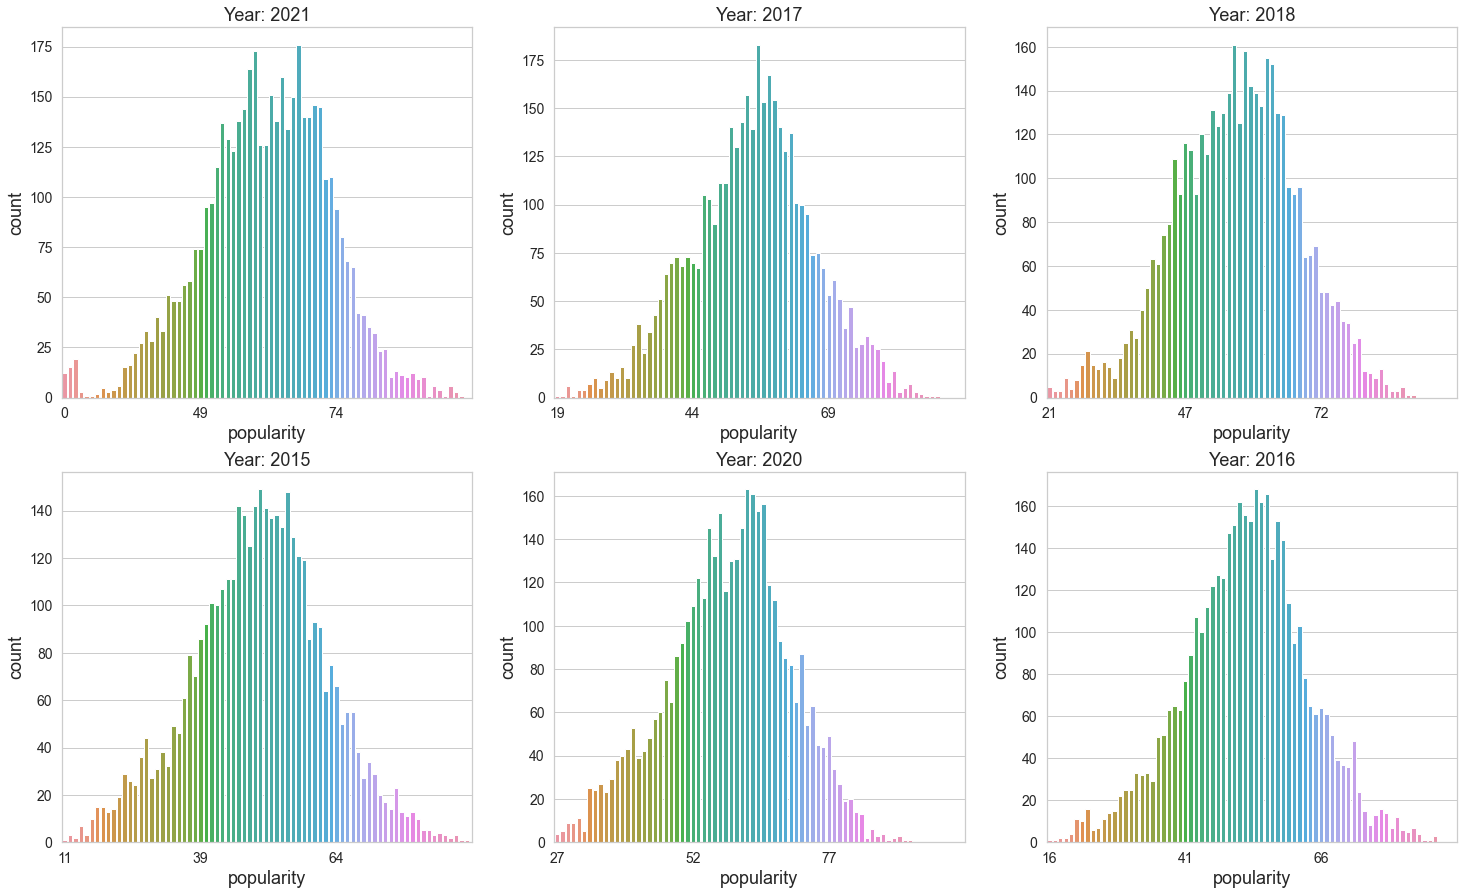

In [55]:
nb_years = df['year'].nunique()
fig, axs = plt.subplots(ncols=3, nrows=(nb_years-1)//3, figsize=(25, 15))

for idx, year in enumerate(df[df['year'] != 2022]['year'].unique()):
    row=idx//3
    col=idx%3
    sns.countplot(x='popularity', data=df[df['year'] == year], ax=axs[row, col])
    axs[row,col].set_xticks([0, 25, 50, 75])
    axs[row, col].set_title(f'Year: {year}')
plt.show()

The distribution of the popularity every year is normal. This may be due to the fact that we used the spotify api to build our database and that it is built to draw song according to a normal distribution of popularity.  This may also be the natural distribution of song popularities. The distribution os a bit diffenrent in 2022 though. 


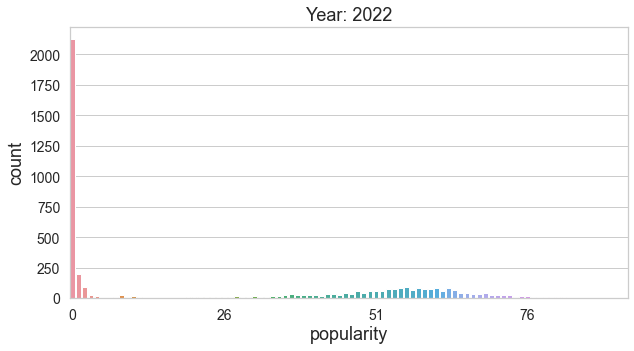

In [56]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x='popularity', data=df[df['year'] == 2022])
plt.xticks([0, 25, 50, 75])
plt.title('Year: 2022')

plt.show()